In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


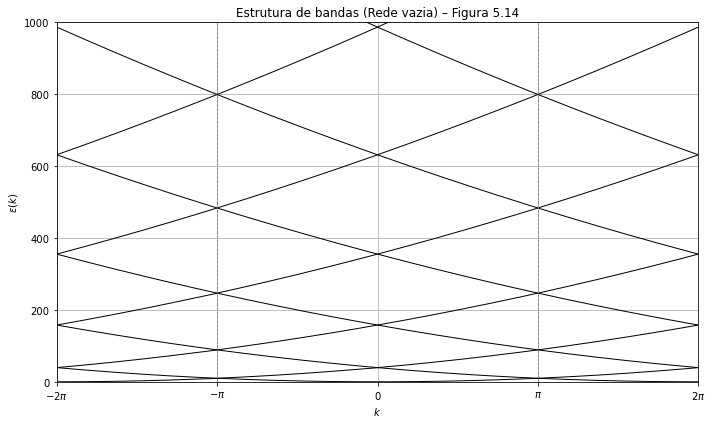

In [5]:
# Parâmetros
num_G = 5  # número de ondas planas de cada lado → G = -5, ..., 5
G_vals = 2 * np.pi * np.arange(-num_G, num_G + 1)  # vetores G
k_vals = np.linspace(-2 * np.pi, 2 * np.pi, 500)   # duas zonas de Brillouin
bands = []

# Hamiltoniano apenas com termo cinético: E = (k + G)^2
for k in k_vals:
    kinetic = np.array([(k + G)**2 for G in G_vals])
    bands.append(np.sort(kinetic))  # já que não há acoplamento, é só a diagonal

bands = np.array(bands)

# Plotagem
plt.figure(figsize=(10, 6))
for i in range(len(G_vals)):
    plt.plot(k_vals, bands[:, i], color="black", linewidth=1)

plt.title("Estrutura de bandas (Rede vazia) – Figura 5.14")
plt.xlabel(r"$k$")
plt.ylabel(r"$\varepsilon(k)$")
plt.xticks(
    [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi],
    [r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$"]
)
plt.grid(True)
plt.axvline(x=-np.pi, linestyle='--', color='gray', linewidth=0.8)
plt.axvline(x=np.pi, linestyle='--', color='gray', linewidth=0.8)
plt.axhline(y=0, linestyle='-', color='black', linewidth=0.8)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(0, 1000)
plt.tight_layout()
plt.savefig("figura_5_14.png")
plt.show()

In [ ]:
# Funções de Potencial

def V_gauss(x, A=1.0, gamma=0.05):
    return -A * np.exp(-x**2 / (2 * gamma**2))

def V_double_gauss(x, A=1.0, B=1.0, gamma=0.05):
    return (-A * np.exp(-(x - 0.25)**2 / (2 * gamma**2))
            -B * np.exp(-(x + 0.25)**2 / (2 * gamma**2)))


# Construção da Matriz V_{mn}

def construir_Vmn(V_func, G_vals):
    N = len(G_vals)
    Vmn = np.zeros((N, N), dtype=complex)
    for m in range(N):
        for n in range(N):
            integrando = lambda x: V_func(x) * np.exp(-1j * (G_vals[m] - G_vals[n]) * x)
            Vmn[m, n], _ = quad(integrando, 0, 1)
    Vmn = 0.5 * (Vmn + Vmn.conj().T)
    return np.real_if_close(Vmn)


# Hamiltoniano e Cálculo de Bandas

def construir_Hk(k, G_vals, Vmn):
    energia_cinetica = 0.5 * (k + G_vals)**2
    return np.diag(energia_cinetica) + Vmn

def calcular_bandas(k_vals, G_vals, Vmn, num_bandas):
    bandas = []
    for k in k_vals:
        Hk = construir_Hk(k, G_vals, Vmn)
        autovalores = np.linalg.eigvalsh(Hk)
        bandas.append(autovalores[:num_bandas])
    return np.array(bandas)


# Parâmetros da Simulação

N = 5
G_vals = 2 * np.pi * np.arange(-N, N + 1)
k_vals = np.linspace(-np.pi, np.pi, 400)
num_bandas = 8
A = 10.0
B = 10.0
gamma = 0.05
x_plot = np.linspace(0, 1, 500)


# Potencial Gaussiano Simples

Vmn_single = construir_Vmn(lambda x: V_gauss(x, A, gamma), G_vals)
bandas_single = calcular_bandas(k_vals, G_vals, Vmn_single, num_bandas)

plt.figure(figsize=(5, 3))
plt.plot(x_plot, V_gauss(x_plot, A, gamma))
plt.title("Potencial Gaussiano Simples")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid(True)
plt.tight_layout()
plt.savefig("potencial_simples.png")
plt.show()

plt.figure(figsize=(8, 5))
for i in range(num_bandas):
    plt.plot(k_vals, bandas_single[:, i])
plt.title("Bandas – Gaussiano Simples")
plt.xlabel("k")
plt.ylabel("Energia")
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.tight_layout()
plt.savefig("bandas_simples.png")
plt.show()


# Potencial Gaussiano Duplo

Vmn_double = construir_Vmn(lambda x: V_double_gauss(x, A, B, gamma), G_vals)
bandas_double = calcular_bandas(k_vals, G_vals, Vmn_double, num_bandas)

plt.figure(figsize=(5, 3))
plt.plot(x_plot, V_double_gauss(x_plot, A, B, gamma))
plt.title("Potencial Gaussiano Duplo")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid(True)
plt.tight_layout()
plt.savefig("potencial_duplo.png")
plt.show()

plt.figure(figsize=(8, 5))
for i in range(num_bandas):
    plt.plot(k_vals, bandas_double[:, i])
plt.title("Bandas – Gaussiano Duplo")
plt.xlabel("k")
plt.ylabel("Energia")
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.tight_layout()
plt.savefig("bandas_duplo.png")
plt.show()


# Bandas usando alpha constante (modelo tridiagonal)

def hamiltoniana_alpha(k, N, alpha):
    dim = 2 * N + 1
    G = 2 * np.pi * np.arange(-N, N + 1)
    diagonal = (k + G)**2
    offdiag = np.full(dim - 1, alpha)
    H = np.diag(diagonal) + np.diag(offdiag, 1) + np.diag(offdiag, -1)
    return H

def calcular_bandas_alpha(N, alpha, k_vals, num_bandas):
    bandas = []
    for k in k_vals:
        H = hamiltoniana_alpha(k, N, alpha)
        eigvals = np.linalg.eigvalsh(H)
        bandas.append(eigvals[:num_bandas])
    return np.array(bandas)

alpha_val = 70
bandas_alpha = calcular_bandas_alpha(N, alpha_val, k_vals, num_bandas)

plt.figure(figsize=(6, 4))
for i in range(num_bandas):
    plt.plot(k_vals, bandas_alpha[:, i])
plt.title(f'Bandas 1D  (method = diag, α = {alpha_val}, N = {N})')
plt.xlabel(r'$k$')
plt.ylabel('Energia')
plt.ylim(-5, 300)
plt.xlim(-np.pi, np.pi)
plt.axvline(-np.pi, ls='--', lw=0.6, color='gray')
plt.axvline( np.pi, ls='--', lw=0.6, color='gray')
plt.grid(True, ls=':', lw=0.4)
plt.tight_layout()
plt.savefig('bandas_4D.png')
plt.show()


# Bandas de energia com Fourier

plt.figure(figsize=(8, 5))
for i in range(num_bandas):
    plt.plot(k_vals, bandas_double[:, i])
plt.title("Bandas 1D – Potencial Gaussiano Duplo")
plt.xlabel("k")
plt.ylabel("Energia")
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.tight_layout()
plt.savefig("bandas_1D_pgd.png")
plt.show()
